Found 771 validated image filenames belonging to 4 classes.
Found 1 validated image filenames belonging to 1 classes.


C:\Users\KB\PycharmProjects\MachineLearnTest\venv\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step
[[1 0 0 0]]
[1, 0, 0, 0]
{0: 'COVID19', 1: 'NORMAL', 2: 'PNEUMONIA', 3: 'TUBERCULOSIS'}
COVID19


(<matplotlib.image.AxesImage at 0x1a60096c7c0>, Text(0.5, 1.0, 'COVID19'))

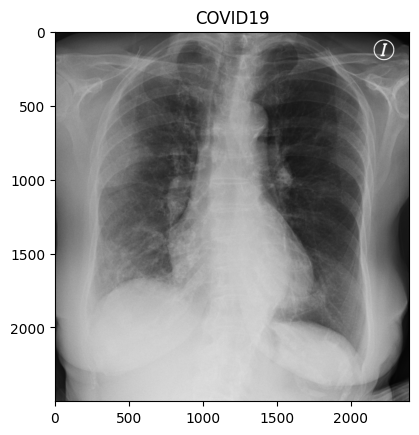

In [1]:
from keras_preprocessing.image import ImageDataGenerator
import keras.src.saving
import pandas as pd
import cv2
from matplotlib import pyplot as plt

loaded_model = keras.src.saving.load_model('current_91.keras')

test_datagen = ImageDataGenerator(rescale=1./255)
df_test = pd.read_csv('train/test.csv')

test_generator = test_datagen.flow_from_dataframe(
    dataframe=df_test,
    x_col='Filename',
    y_col='Label',
    batch_size=1,
    seed=42,
    shuffle=False,
    class_mode='categorical',
    target_size=(150,150)
)

single_image_dataframe = pd.read_csv('train/example.csv')
single_image_dataset = test_datagen.flow_from_dataframe(
    dataframe=single_image_dataframe,
    x_col='Filename',
    y_col='Label',
    batch_size=1,
    seed=42,
    shuffle=False,
    class_mode='categorical',
    target_size=(150,150)
)

# y_prediction = loaded_model.predict(single_image_dataset)
# print(y_prediction)
# testPredict = np.argmax(y_prediction, axis=1)
# print(testPredict)

prediction = ((loaded_model
              .predict(single_image_dataset) > 0.5)
              .astype("int32"))

print(prediction)

result_list = []

for y in prediction:
    for x in y:
        result_list.append(x)

train_dict = test_generator.class_indices
inv_train_dict = {v:k  for k,v in train_dict.items()}

print(result_list)
print(inv_train_dict)
print(inv_train_dict[result_list.index(1)])

img = cv2.imread(single_image_dataframe['Filename'].values[0])
plt.imshow(img), plt.title(inv_train_dict[result_list.index(1)])